In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 5/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Observations :-

1. We can see that R&D spend, Administration, Marketing Spend and Profit consists of floating point data type values and State has object type values.
2. We can also see that all 50 observations are non null and hence we don't have any missing values.

In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data[data.duplicated()].shape

(0, 5)

We don't have any duplicate values in our dataset.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Observations :-

1. The mean value and the median value (50% percentile) are not having much difference between them for all the columns.
2. There is not a big difference in the 75% value and max value for all the columns except Marketing Spend column. For Marketing Spend, the 75% value is at 299469 but max value is 471784 (almost double).
3. From observations 1 and 2, it looks like there is no outlier for R&D Spend, Administration and Profit. However, we can say there is a chance of outlier in Marketing Spend column. But we will be confirming that below with the help of boxplot.

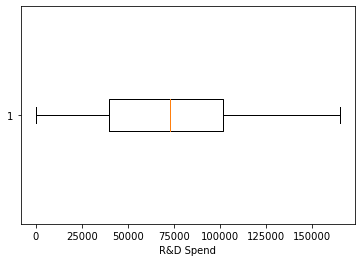

In [7]:
plt.boxplot(data["R&D Spend"], vert=False)
plt.xlabel("R&D Spend")
plt.show()

There are no outliers in the R & D spend column.

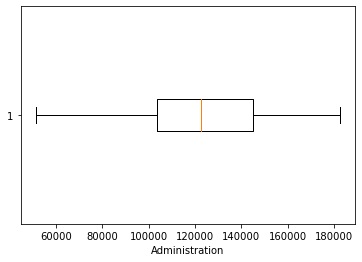

In [8]:
plt.boxplot(data["Administration"], vert=False)
plt.xlabel("Administration")
plt.show()

There are no outliers in the Administration column.

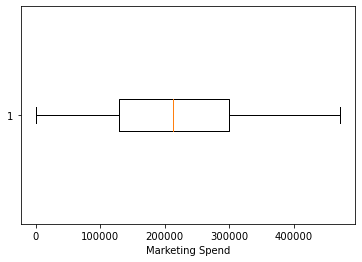

In [9]:
plt.boxplot(data["Marketing Spend"], vert=False)
plt.xlabel("Marketing Spend")
plt.show()

There are no outliers in the Marketing Spend column.

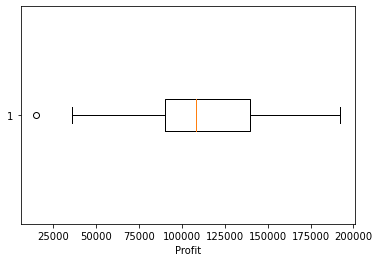

In [10]:
plt.boxplot(data["Profit"], vert=False)
plt.xlabel("Profit")
plt.show()

There is an outliers in the Profit column. The value is less than 25,000 which means the company made once very less profit.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

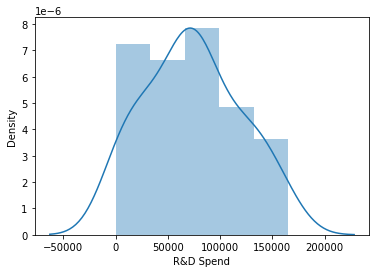

In [11]:
sns.distplot(data["R&D Spend"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

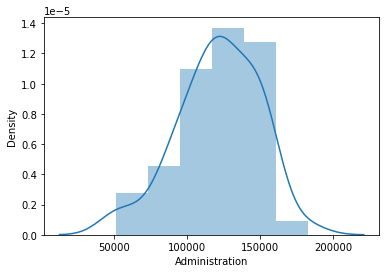

In [12]:
sns.distplot(data["Administration"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

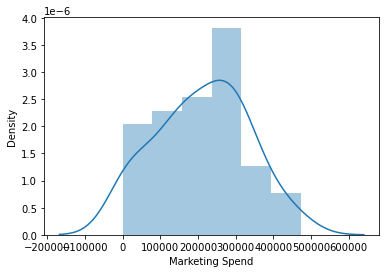

In [13]:
sns.distplot(data["Marketing Spend"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

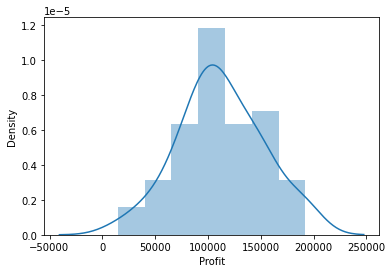

In [14]:
sns.distplot(data["Profit"])

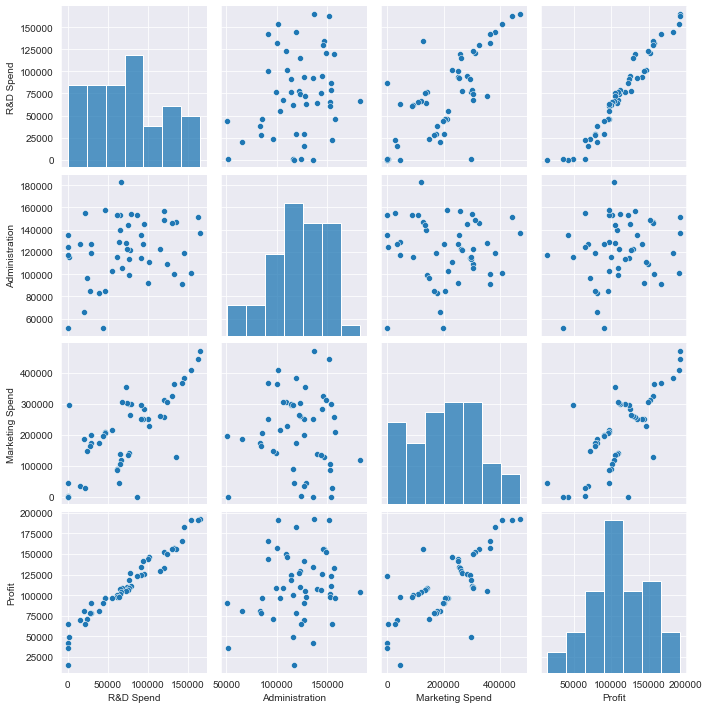

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

Observations :-
    
1. There is an increase in Profit with increase in R & D spend. It means there is a positive correlation between them.
2. There exist a positive correlation between R & D spend and Marketing Spend as well.

# Correlation Analysis

In [16]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Correlation only works on the continuous variables and we have State variable which is a categorical variable. So we need to convert the State variable into numerical values.

In [17]:
data = pd.get_dummies(data, columns=["State"])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [18]:
data1 = data.rename({'R&D Spend':'RDS', 'Administration':'ADMS', 'Marketing Spend':'MKTS', 'State_California':'S_CA', 'State_Florida':'S_FL', 'State_New York':'S_NY'}, axis=1)
data1.head()

,RDS,ADMS,MKTS,Profit,S_CA,S_FL,S_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [19]:
data1.corr()

,RDS,ADMS,MKTS,Profit,S_CA,S_FL,S_NY
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
ADMS,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MKTS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
S_CA,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
S_FL,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
S_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

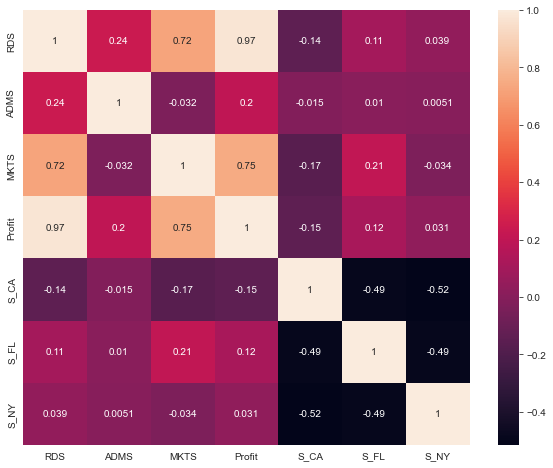

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), annot=True, cmap='rocket')

Observations :-
    
1. There exist a positive correlation between R&D spend and Marketing Spend with value 0.72.
2. There is a very high positive correlation between Profit and R&D Spend as well with a value of 0.972.
3. The correlation value for Administration and R&D Spend is 0.24 so we can say there is very low correlation between them.
4. The correlation value for Administration and Marketing Spend is -0.03 so we can say there is negative correlation between them but it very low.
5. The correlation values between the states California, Florida and New York and Profit is very less (almost 0).

# Standardization

The scale is very different for States and the other variables so we will use Standard Scaler technique for standardizing the other variables.

In [21]:
std = StandardScaler().fit_transform(data1)
std_data = pd.DataFrame(std, columns=data1.columns)
std_data.head()

,RDS,ADMS,MKTS,Profit,S_CA,S_FL,S_NY
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


## Preparing a linear regression model

In [22]:
model_1 = smf.ols("Profit~RDS+ADMS+MKTS+S_CA+S_FL+S_NY", data=std_data).fit()
model_1.tvalues, model_1.pvalues

(Intercept   -1.597038e-14
 RDS          1.736858e+01
 ADMS        -5.170116e-01
 MKTS         1.573889e+00
 S_CA        -2.676515e-02
 S_FL         7.490466e-02
 S_NY        -4.931619e-02
 dtype: float64,
 Intercept    1.000000e+00
 RDS          2.578772e-21
 ADMS         6.077373e-01
 MKTS         1.226769e-01
 S_CA         9.787681e-01
 S_FL         9.406301e-01
 S_NY         9.608905e-01
 dtype: float64)

In [23]:
model_1.rsquared, model_1.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [24]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.34e-27
Time:                        10:57:17   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.343e-16      0.033   -1.6e-14      1.000      -0.067       0.067
RDS            0.9179      0.053     17.369      0.000       0.811       1.024
ADMS          -0.0188      0.036     -0.517      0.608      -0.092       0.054
MKTS           0.0819      0.052      1.574      0.123      -0.023       0.187
S_CA          -0.0006      0.023     -0.027      0.979      -0.046       0.045
S_FL           0.0017      0.023      0.075      0.941      -0.045       0.048
S_NY          -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observations :-

1. If we observe the p values in above table, we can see that the p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork.
2. We need to check how these variables individually affect Profit value. 
3. So we will build a Simple Linear Regression model for each variable and check the p values.

## Simple Linear Regression between Profit and R&D Spend

In [25]:
model_2 = smf.ols("Profit~RDS", data=std_data).fit()
model_2.tvalues, model_2.pvalues

(Intercept   -1.611310e-14
 RDS          2.915114e+01
 dtype: float64,
 Intercept    1.000000e+00
 RDS          3.500322e-32
 dtype: float64)

In [26]:
model_2.rsquared, model_2.rsquared_adj

(0.9465353160804392, 0.9454214684987816)

In [27]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.50e-32
Time:                        10:57:17   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.033  -1.61e-14      1.000      -0.067       0.067
RDS            0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-
    
1. p_value < 0.05
2. R_Square = 0.947
3. The correlation value between Profit and R&D Spend = 0.97

Hence we can say that profit is actually dependent on R&D Spend.

## Simple Linear Regression between Profit and Administration

In [28]:
model_3 = smf.ols("Profit~ADMS", data=std_data).fit()
model_3.tvalues, model_3.pvalues

(Intercept   -3.803136e-15
 ADMS         1.419493e+00
 dtype: float64,
 Intercept    1.000000
 ADMS         0.162217
 dtype: float64)

In [29]:
model_3.rsquared, model_3.rsquared_adj

(0.04028714077757234, 0.020293122877105163)

In [30]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.162
Time:                        10:57:18   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.141   -3.8e-15      1.000      -0.284       0.284
ADMS           0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value > 0.05
2. R_Square = 0.040
3. The correlation value between Profit and R&D Spend = 0.20

Hence we can say that the Administration variable is not important in predicting the Profit values.

## Simple Linear Regression between Profit and Marketing Spend

In [31]:
model_4 = smf.ols("Profit~MKTS", data=std_data).fit()
model_4.tvalues, model_4.pvalues

(Intercept   -5.611370e-15
 MKTS         7.802657e+00
 dtype: float64,
 Intercept    1.000000e+00
 MKTS         4.381073e-10
 dtype: float64)

In [32]:
model_4.rsquared, model_4.rsquared_adj

(0.5591535746115515, 0.5499692740826254)

In [33]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        10:57:19   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.096  -5.61e-15      1.000      -0.193       0.193
MKTS           0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value < 0.05
2. R_Square = 0.559 
3. The correlation value between Profit and R&D Spend = 0.75


Hence we can say that the Profit is actually dependent on Marketing Spend.

But when we used Marketing Spend to fit the "model_1" the p -value came as 0.123 (greater than 0.05). 
This means that Marketing Spend individually is affecting the Profit but when it is used by other features it is not. 

So we can say there is a chances of multicollinearity problem.

## Simple Linear Regression between Profit and State_California

In [34]:
model_5 = smf.ols("Profit~S_CA", data=std_data).fit()
model_5.tvalues, model_5.pvalues

(Intercept   -3.766004e-15
 S_CA        -1.021308e+00
 dtype: float64,
 Intercept    1.000000
 S_CA         0.312229
 dtype: float64)

In [35]:
model_5.rsquared, model_5.rsquared_adj

(0.021268441461161802, 0.0008782006582693791)

In [36]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.312
Time:                        10:57:20   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.143  -3.77e-15      1.000      -0.287       0.287
S_CA          -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value > 0.05
2. R_Square = 0.021
3. The correlation value between Profit and R&D Spend = -0.15

Hence we can say that the Profit is actually not dependent on State_California variable.

## Simple Linear Regression between Profit and State_Florida

In [37]:
model_6 = smf.ols("Profit~S_FL", data=std_data).fit()
model_6.tvalues, model_6.pvalues

(Intercept   -3.751171e-15
 S_FL         8.108610e-01
 dtype: float64,
 Intercept    1.000000
 S_FL         0.421448
 dtype: float64)

In [38]:
model_6.rsquared, model_6.rsquared_adj

(0.013512728677721686, -0.007039089474825788)

In [39]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.421
Time:                        10:57:21   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.143  -3.75e-15      1.000      -0.288       0.288
S_FL           0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value > 0.05
2. R_Square = 0.014
3. The correlation value between Profit and R&D Spend = 0.12

Hence we can say that the Profit is actually not dependent on State_Florida variable.

## Simple Linear Regression between Profit and State_NewYork

In [40]:
model_7 = smf.ols("Profit~S_NY", data=std_data).fit()
model_7.tvalues, model_7.pvalues

(Intercept   -3.727574e-15
 S_NY         2.174281e-01
 dtype: float64,
 Intercept    1.000000
 S_NY         0.828796
 dtype: float64)

In [41]:
model_7.rsquared, model_7.rsquared_adj

(0.0009839263392518172, -0.019828908528680467)

In [42]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Mon, 13 Jun 2022   Prob (F-statistic):              0.829
Time:                        10:57:22   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.144  -3.73e-15      1.000      -0.290       0.290
S_NY           0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :-

1. p_value > 0.05
2. R_Square = 0.001
3. The correlation value between Profit and R&D Spend = 0.031

Hence we can say that the Profit is actually not dependent on State_NewYork variable.

# Calculating VIF

In [43]:
rsq_rds = smf.ols("RDS~ADMS+MKTS+S_CA+S_FL+S_NY", data=std_data).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_adms = smf.ols("ADMS~RDS+MKTS+S_CA+S_FL+S_NY", data=std_data).fit().rsquared
vif_adms = 1/(1-rsq_adms)

rsq_mkts = smf.ols("MKTS~RDS+ADMS+S_CA+S_FL+S_NY", data=std_data).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)

rsq_sca = smf.ols("S_CA~RDS+ADMS+MKTS+S_FL+S_NY", data=std_data).fit().rsquared
vif_sca = 1/(1-rsq_sca)

rsq_sfl = smf.ols("S_FL~RDS+ADMS+MKTS+S_CA+S_NY", data=std_data).fit().rsquared
vif_sfl = 1/(1-rsq_sfl)

rsq_sny = smf.ols("S_NY~RDS+ADMS+MKTS+S_CA+S_FL", data=std_data).fit().rsquared
vif_sny = 1/(1-rsq_sny)

d1={'Features':['RD', 'ADMS', 'MKTS', 'S_CA', 'S_FL', 'S_NY'], 'VIF':[vif_rds, vif_adms, vif_mkts, vif_sca, vif_sfl, vif_sny]}
VIF_Frame = pd.DataFrame(d1)
VIF_Frame

C:\Users\BASHAR\AppData\Local\Temp/ipykernel_10880/938315734.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sca = 1/(1-rsq_sca)
C:\Users\BASHAR\AppData\Local\Temp/ipykernel_10880/938315734.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sfl = 1/(1-rsq_sfl)
C:\Users\BASHAR\AppData\Local\Temp/ipykernel_10880/938315734.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sny = 1/(1-rsq_sny)


,Features,VIF
0,RD,2.495511
1,ADMS,1.177766
2,MKTS,2.416797
3,S_CA,inf
4,S_FL,inf
5,S_NY,inf


Observations :-

1. Here, VIF value is infinite for the State variables, so we can confirm collinearlity does not exist between them.

2. From the above Simple Regression models and VIF values we can say that the State variables are not significant variaables for predicting the Profit values.

3. We will build a model using R&D Spend, Administration, and Marketing Spend

### Simple Linear Regression between Profit and R&D Spend, Administration, Marketing Spend.

In [44]:
model_8 = smf.ols("Profit~RDS+ADMS+MKTS", data=std_data).fit()
model_8.tvalues, model_8.pvalues

(Intercept   -1.632823e-14
 RDS          1.784637e+01
 ADMS        -5.255068e-01
 MKTS         1.655077e+00
 dtype: float64,
 Intercept    1.000000e+00
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MKTS         1.047168e-01
 dtype: float64)

In [45]:
model_8.rsquared, model_8.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [46]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        10:57:26   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.343e-16      0.033  -1.63e-14      1.000      -0.066       0.066
RDS            0.9176      0.051     17.846      0.000       0.814       1.021
ADMS          -0.0186      0.035     -0.526      0.602      -0.090       0.053
MKTS           0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R_Square value Table

In [47]:
d2 = {'Models':['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8'], 'R_Square':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared,model_6.rsquared,model_7.rsquared,model_8.rsquared], 'AIC':[model_1.aic,model_2.aic,model_3.aic,model_4.aic,model_5.aic,model_6.aic,model_7.aic,model_8.aic]}
R_square_table = pd.DataFrame(d2)
R_square_table

,Models,R_Square,AIC
0,model_1,0.950752,3.349036
1,model_2,0.946535,-0.542845
2,model_3,0.040287,143.837796
3,model_4,0.559154,104.940918
4,model_5,0.021268,144.818960
5,model_6,0.013513,145.213610
6,model_7,0.000984,145.844633
7,model_8,0.950746,-0.644375


Observations :-

Comparing above R-Square and AIC values, "model_8" has high R-square and low AIC value hence include variable 'RDS', 'ADMS', & 'MKTS' so that multi collinearity problem would be resolved.

## Residual Plot for Homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


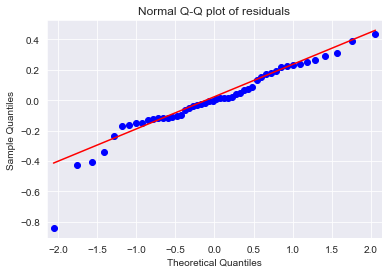

In [48]:
qqplot=sm.qqplot(model_8.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [49]:
res = model_8.resid
res.head()

0   -0.006502
1    0.066046
2    0.223130
3    0.230703
4   -0.149158
dtype: float64

In [50]:
res.mean()

5.773159728050814e-17

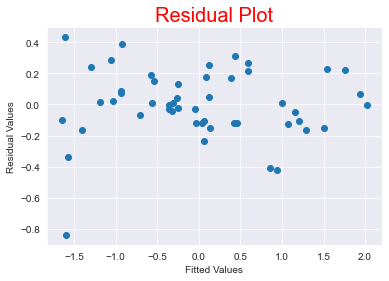

In [51]:
plt.scatter(model_8.fittedvalues, model_8.resid)
plt.title("Residual Plot", size=20, color = "red")
plt.xlabel("Fitted Values")
plt.ylabel("Residual Values")
plt.show()

Observations :-
    
There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance.

## Residual Vs Regressors

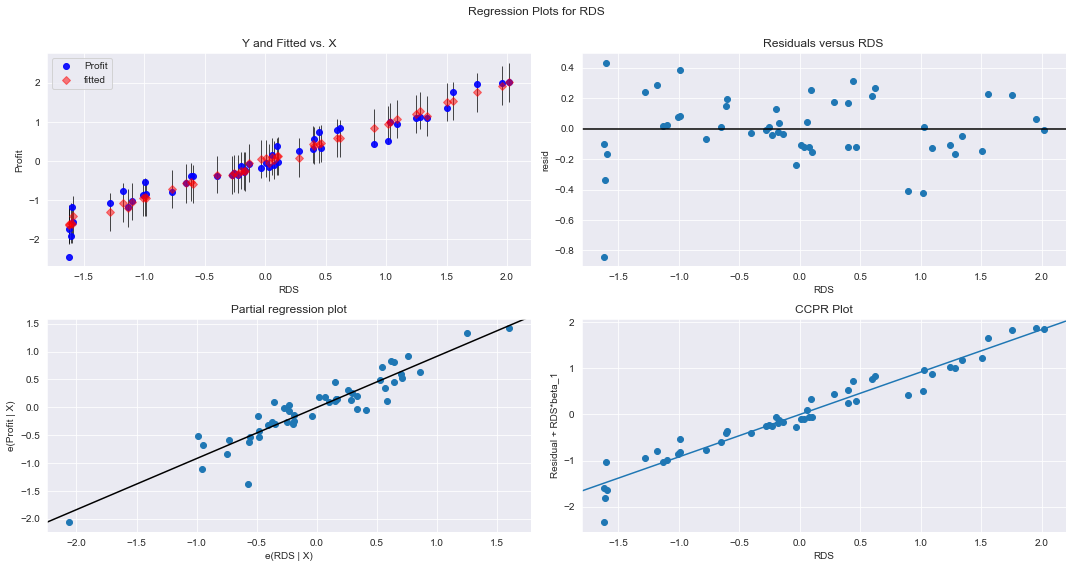

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_8, "RDS", fig=fig)
plt.show()

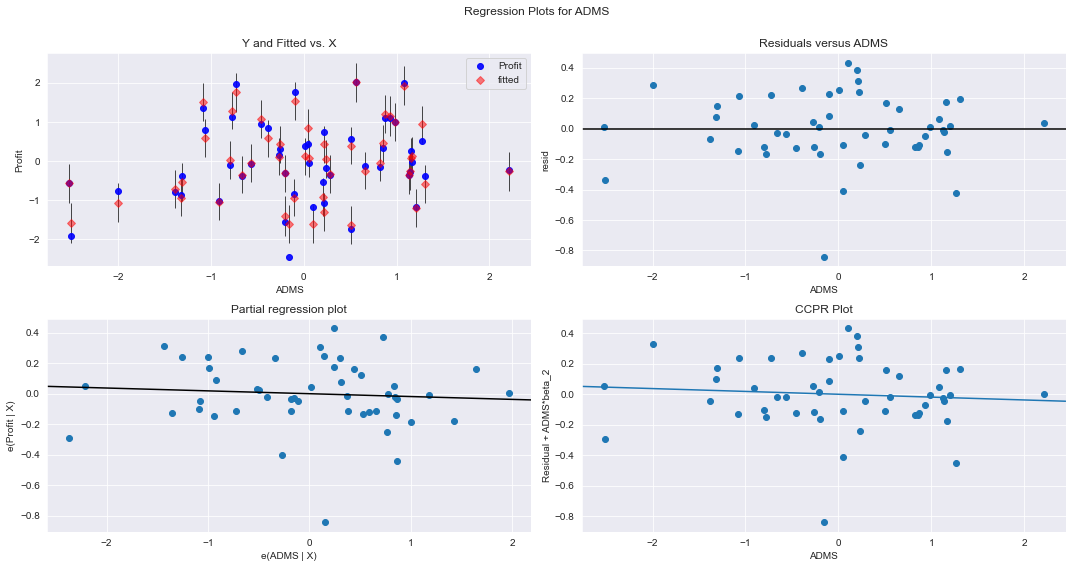

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_8, "ADMS", fig=fig)
plt.show()

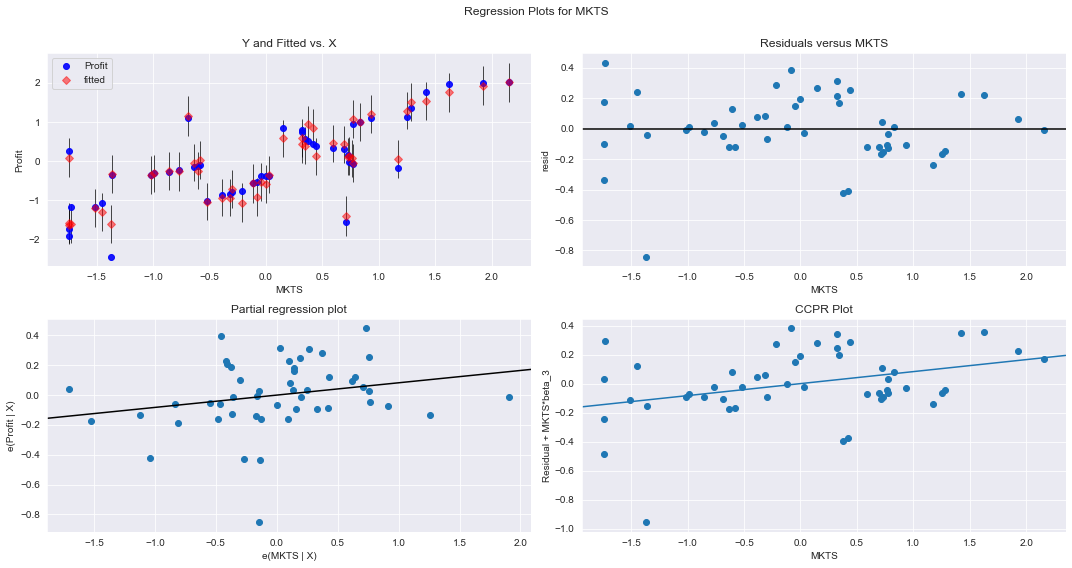

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_8, "MKTS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers using Cook’s Distance

In [55]:
model_influence = model_8.get_influence()
(c,_) = model_influence.cooks_distance

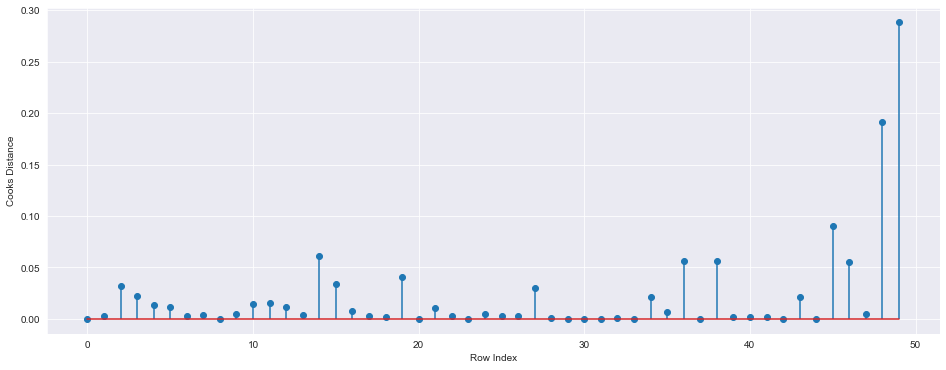

In [56]:
plt.subplots(figsize=(16,6))
plt.stem(np.arange(len(std_data)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [57]:
np.argmax(c), np.max(c)

(49, 0.2880822927543273)

In [58]:
std_data1 = std_data.drop(std_data.index[49], axis=0)
std_data1.tail()

,RDS,ADMS,MKTS,Profit,S_CA,S_FL,S_NY
44,-1.134305,1.206419,-1.509074,-1.173209,1.393261,-0.685994,-0.717741
45,-1.600350,0.101254,-1.727400,-1.180082,-0.717741,-0.685994,1.393261
46,-1.593413,-0.199322,0.711122,-1.566922,-0.717741,1.457738,-0.717741
47,-1.622362,0.507722,-1.743127,-1.740627,1.393261,-0.685994,-0.717741
48,-1.610433,-2.509409,-1.743127,-1.913212,-0.717741,-0.685994,1.393261


# Improving the model

In [59]:
model_8A = smf.ols("Profit~RDS+ADMS+MKTS", data=std_data1).fit()
model_8A.tvalues, model_8A.pvalues

(Intercept     0.654017
 RDS          20.469501
 ADMS         -0.517889
 MKTS          1.825383
 dtype: float64,
 Intercept    5.164296e-01
 RDS          1.971077e-24
 ADMS         6.070728e-01
 MKTS         7.458443e-02
 dtype: float64)

In [60]:
model_8A.rsquared, model_8A.aic

(0.9613162435129847, -17.662259143038426)

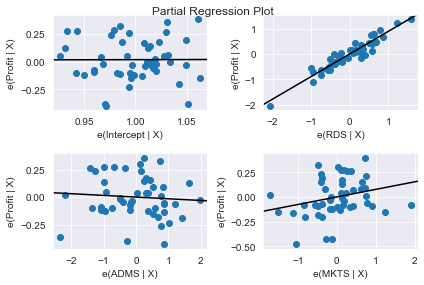

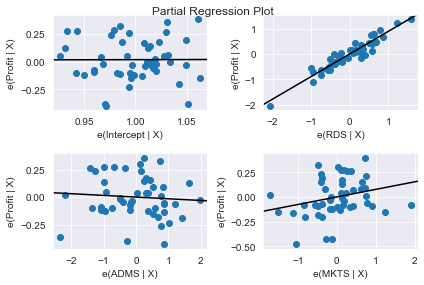

In [61]:
sm.graphics.plot_partregress_grid(model_8A)

# Output Interpretation

We will use "model_8A" as it has the best R square and AIC value.

Also p-value < 0.05

Thus the model is accepted.

## Predicting for new data

In [62]:
new_data=pd.DataFrame({'RDS':151617.2,"ADMS":121614.9,"MKTS":181513.5,"S_CA":1,"S_CA":0,'S_CA':0},index=[1])

In [63]:
model_8A.predict(new_data)

1    147218.841695
dtype: float64

# Final prediction for profit of 50_startups data

In [64]:
model_8A.predict(data1)

0     181451.011642
1     176639.090436
2     166496.220252
3     156245.008610
4     153342.318278
5     143836.523788
6     127544.679944
7     138738.547952
8     129051.247543
9     131651.435544
10    106714.975825
11    107474.315256
12    100862.288790
13     99283.733371
14    124177.581111
15    120271.423530
16     87927.004788
17    103801.912078
18    102630.857415
19     74692.466318
20     89104.963137
21     90475.589860
22     87309.095172
23     81920.634271
24     77931.359198
25     66071.082470
26     75210.185767
27     89365.655535
28     65125.701411
29     64342.069971
30     60473.633272
31     58913.489088
32     58076.598117
33     64326.619252
34     55103.712831
35     55453.176936
36     38997.252436
37     53590.843325
38     31205.089969
39     46500.400267
40     37040.326256
41     36157.009395
42     30927.396816
43     14581.312661
44     19556.420387
45      -878.316841
46     22132.658095
47     -2089.985868
48      -315.165593
49      1653.075908
